In [1]:
import os
import numpy as np
import pandas as pd
import cv2 as cv
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from PIL import Image

In [2]:
def fix_layout(width:int=95):
    from IPython.core.display import display, HTML
    display(HTML('<style>.container { width:' + str(width) + '% !important; }</style>'))

fix_layout()

In [3]:
# reminder: image is downscaled by 3, we need to downscale the label coordinates as well
scale = 3

This notebook creates the "extract" images for the new one merging the fluo images.
The "extract" images were already done from the original wafer images

### Select Dataset

In [4]:
rgb = True

if(rgb==True):
    path_rgb = "rgb"
else:
    path_rgb="intensity"


In [5]:
DATASET_NUMBER = 1

AUGMENTED_DATASET_PATH = "../augmented_dataset"
WAFER_CROPPED_PATH = f"{AUGMENTED_DATASET_PATH}/wafer_cropped_{DATASET_NUMBER}"
FLUO_CROPPED_PATH = f"{AUGMENTED_DATASET_PATH}/wafer_{path_rgb}_cropped_{DATASET_NUMBER}"

In [6]:
index = pd.MultiIndex.from_tuples([('point_1', 'x'), ('point_1', 'y'), ('point_2', 'x'), ('point_2', 'y'),
                                   ('point_3', 'x'), ('point_3', 'y'), ('point_4', 'x'), ('point_4', 'y')])

In [7]:
path_cropped

NameError: name 'path_cropped' is not defined

In [8]:
index_cropped_image = 0

path_cropped = f"{WAFER_CROPPED_PATH}/extract/{index_cropped_image}.tif"
if os.path.isfile(path_cropped):
    cropped = cv.imread(path_cropped,0)
else:
    print ("The file " + path_cropped + " does not exist.")

plt.imshow(cropped)

The file ../augmented_dataset/wafer_cropped_1/extract/0.tif does not exist.


NameError: name 'cropped' is not defined

In [9]:
path_cropped = f"{FLUO_CROPPED_PATH}/original/{index_cropped_image}.tif"
if os.path.isfile(path_cropped):
    fluo_cropped = cv.imread(path_cropped)
else:
    print ("The file " + path_cropped + " does not exist.")

plt.imshow(fluo_cropped)

The file ../augmented_dataset/wafer_rgb_cropped_1/original/0.tif does not exist.


NameError: name 'fluo_cropped' is not defined

In [121]:
if( ( cropped.shape[0] == fluo_cropped.shape[0] ) and ( cropped.shape[1] == fluo_cropped.shape[1] ) ):
    height = cropped.shape[0]
    width = cropped.shape[1]
else:
    print("Error : Different Size")

In [122]:
for i in range(height):
    for j in range(width):
        if(cropped[i,j] == 0):
            if(rgb==True):
                fluo_cropped[i,j] = [0,0,0]
            else:
                fluo_cropped[i,j] = 0

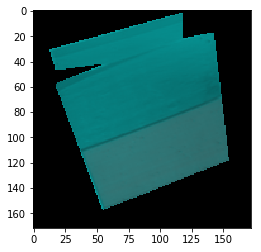

In [123]:
plt.imshow(fluo_cropped)

In [115]:
nb_extract = len(os.listdir(f"{WAFER_CROPPED_PATH}/extract/"))

### Create extract image for the complete dataset

0


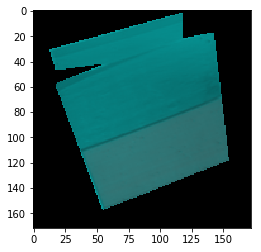

1


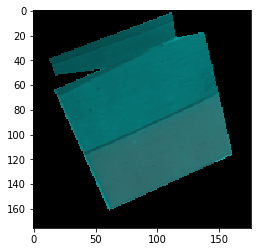

2


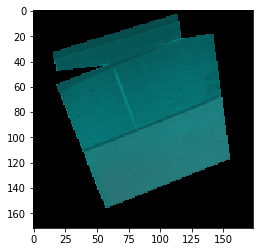

3


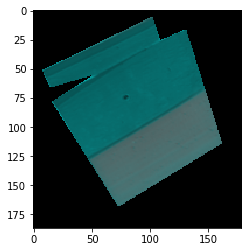

4


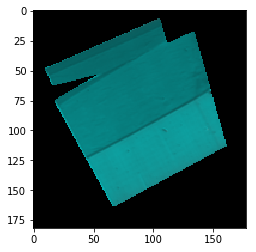

5


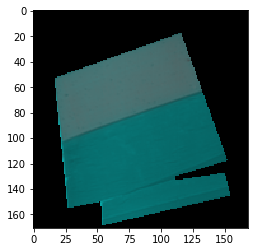

6


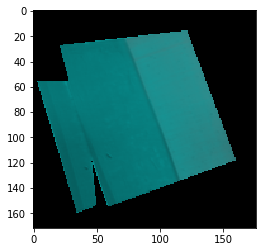

7


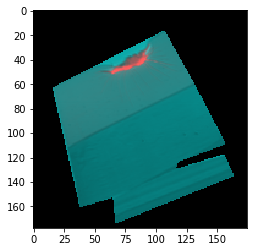

8


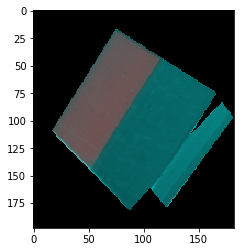

9


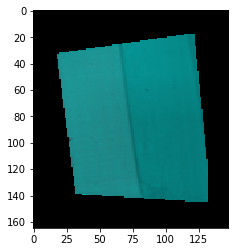

10


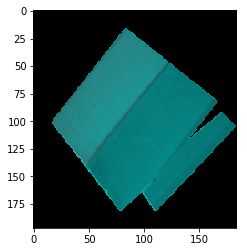

11


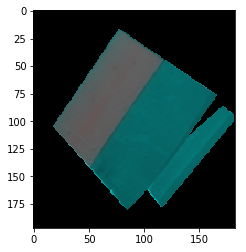

12


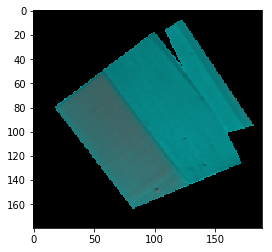

13


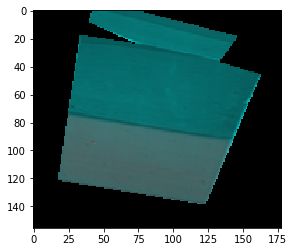

14


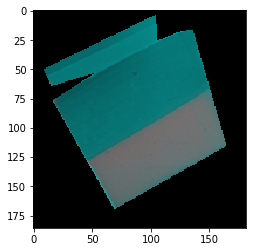

15


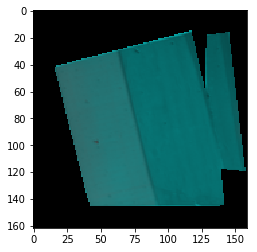

16


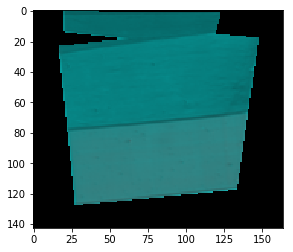

17


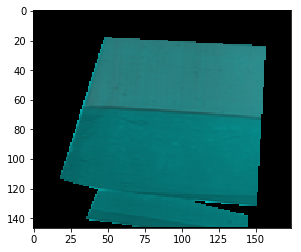

18


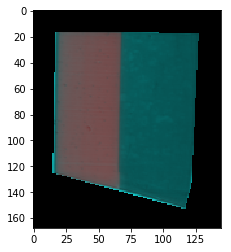

19


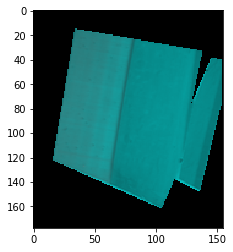

20


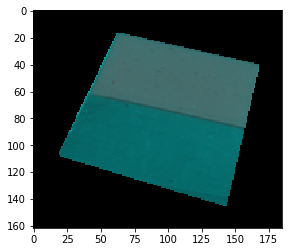

21


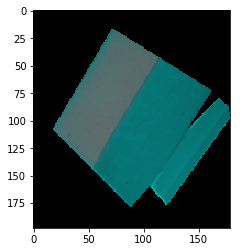

22


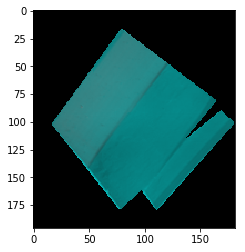

23


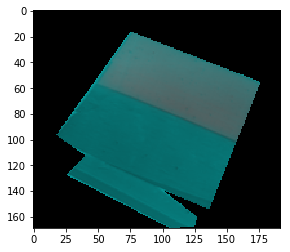

24


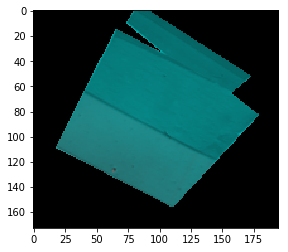

25


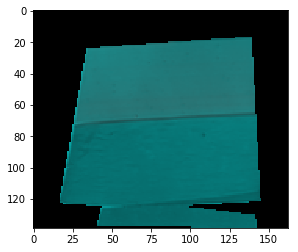

26


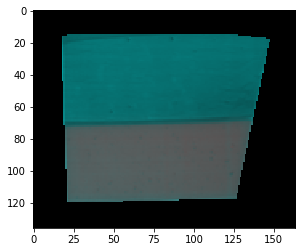

27


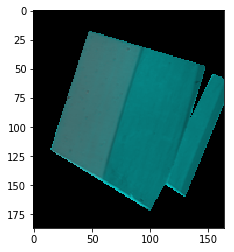

28


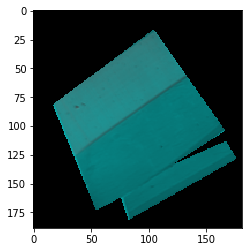

29


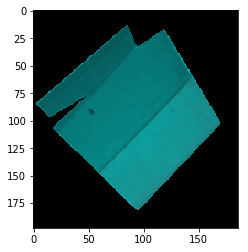

30


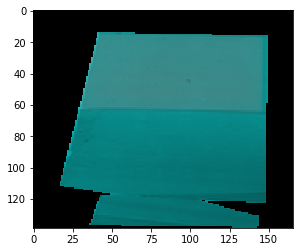

31


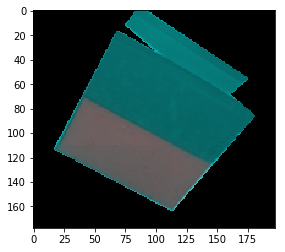

32


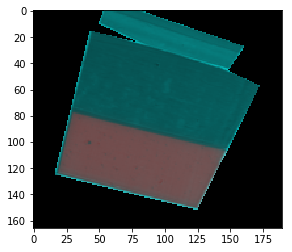

33


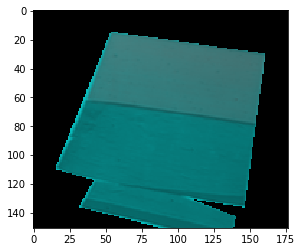

34


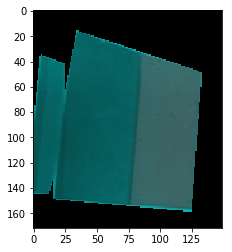

35


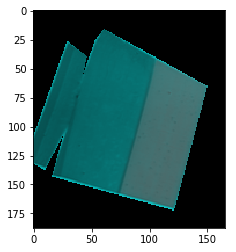

36


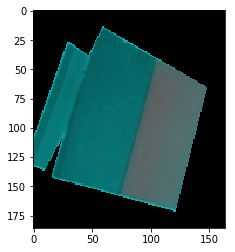

37


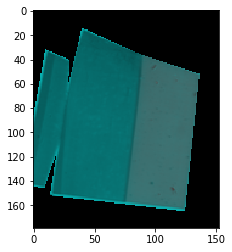

38


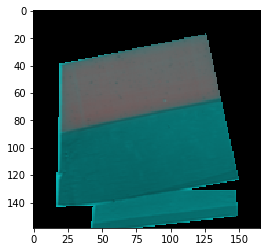

39


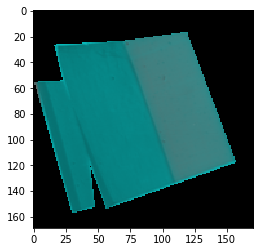

40


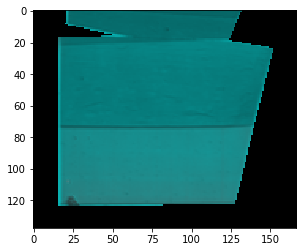

41


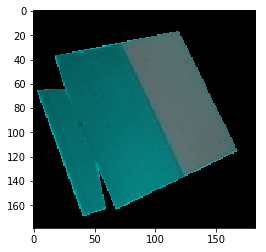

42


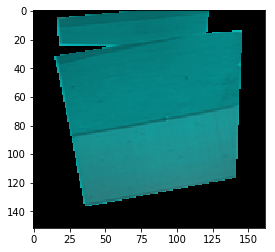

43


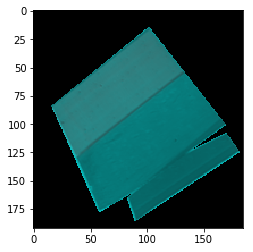

44


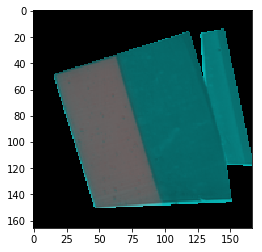

45


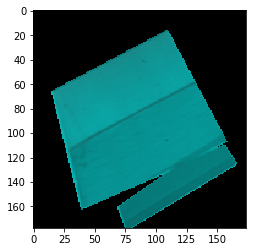

46


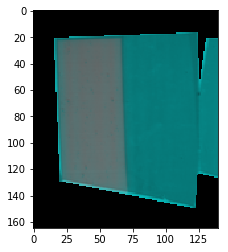

47


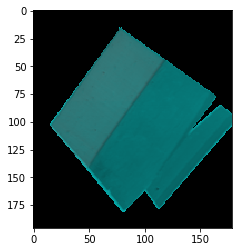

48


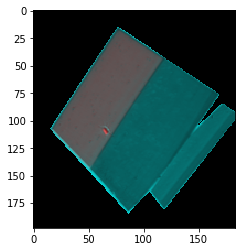

49


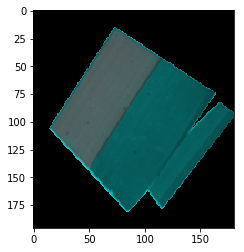

50


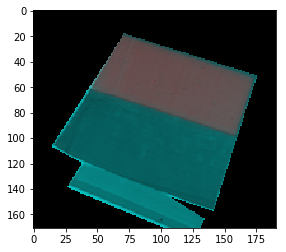

51


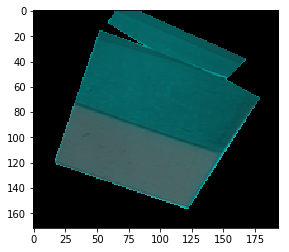

52


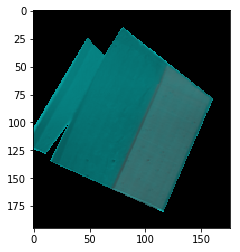

53


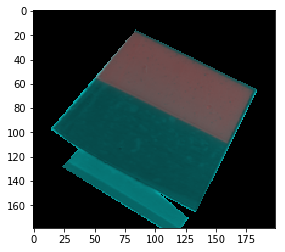

54


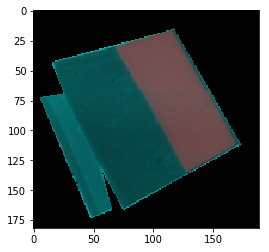

55


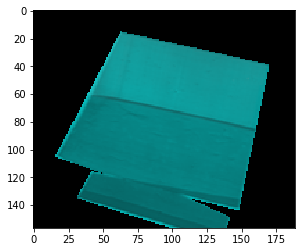

56


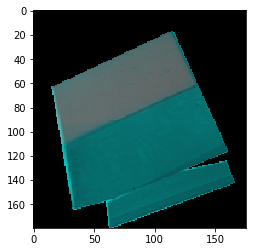

57


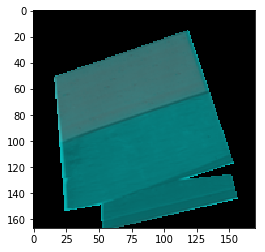

58


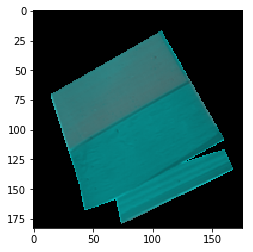

59


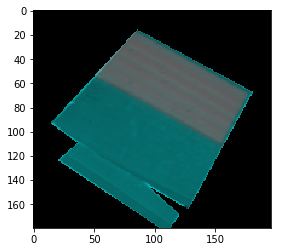

60


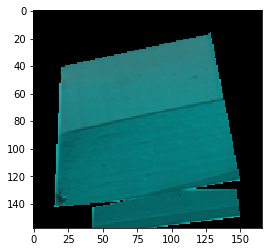

61


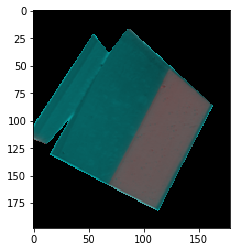

62


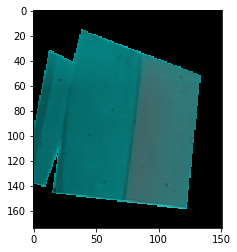

63


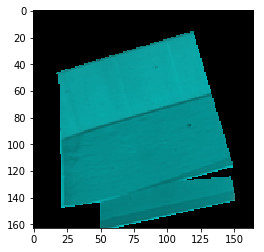

64


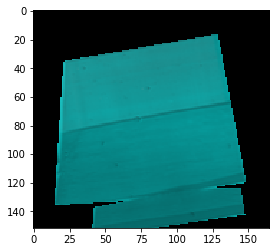

65


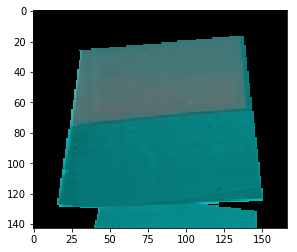

66


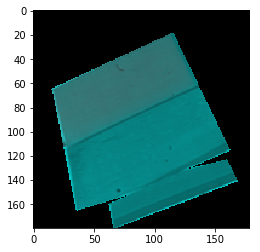

67


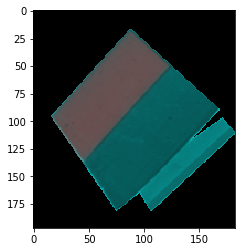

68


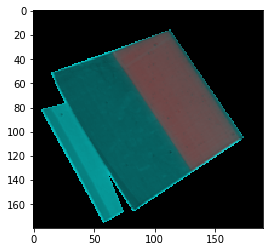

69


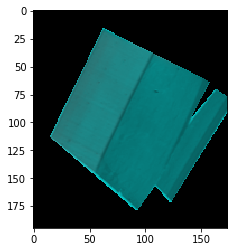

70


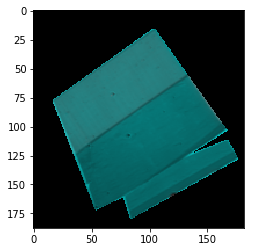

71


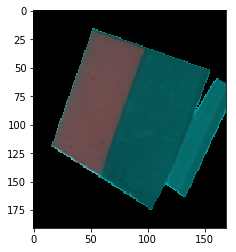

72


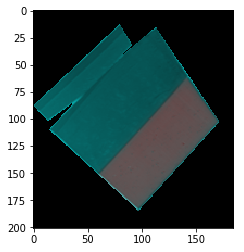

73


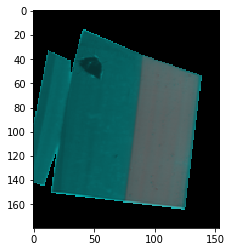

74


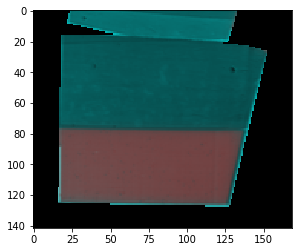

75


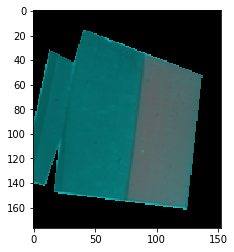

76


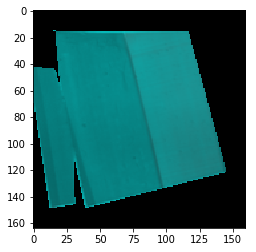

77


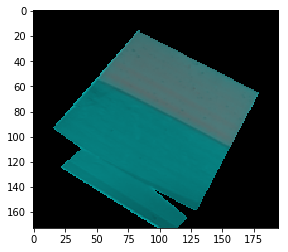

78


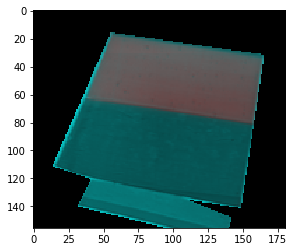

79


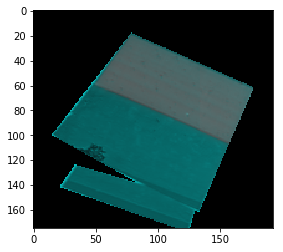

80


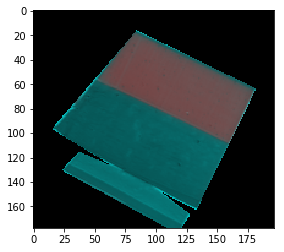

81


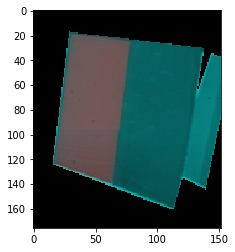

82


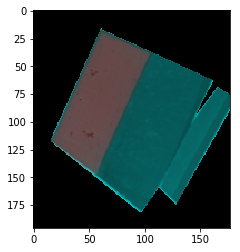

83


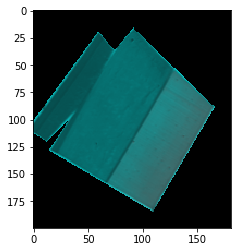

84


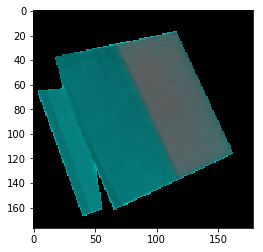

85


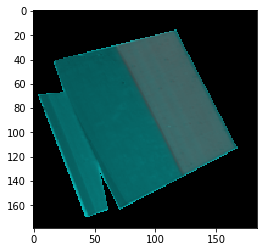

86


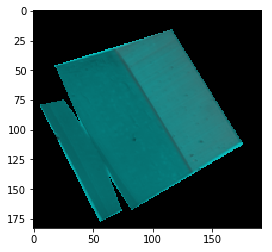

87


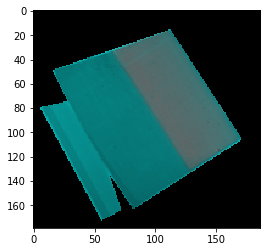

88


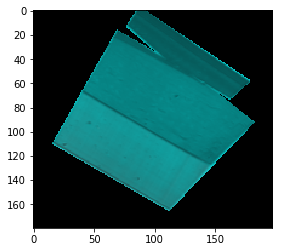

89


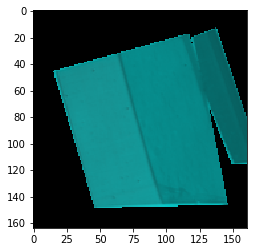

90


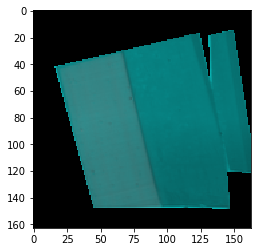

91


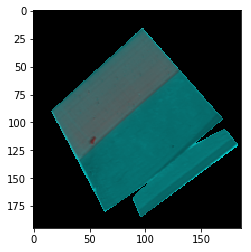

92


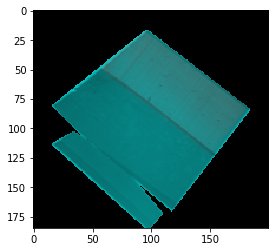

93


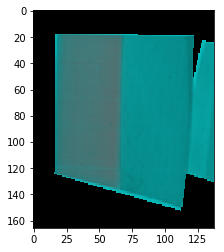

94


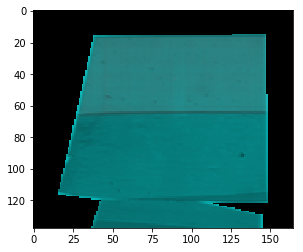

95


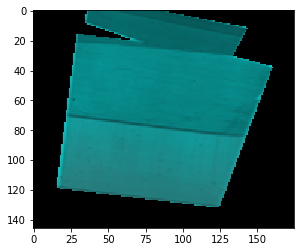

96


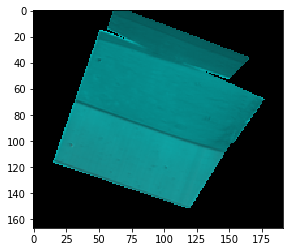

97


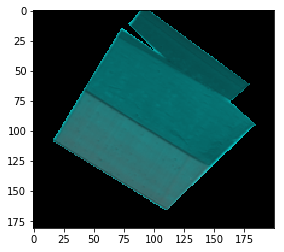

98


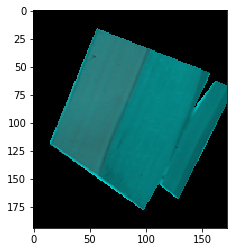

99


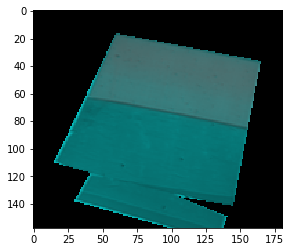

100


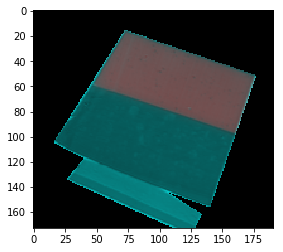

In [124]:
for index_image in range(nb_extract):
    
    print(index_image)
    

    path_extract = f"{WAFER_CROPPED_PATH}/extract/{index_image}.tif"
    
    extracted = cv.imread(path_extract,0)

    
    path_fluo = f"{FLUO_CROPPED_PATH}/original/{index_image}.tif"
    fluo = cv.imread(path_fluo)

    if( ( extracted.shape[0] == fluo.shape[0] ) and ( extracted.shape[1] == fluo.shape[1] ) ):
        height = extracted.shape[0]
        width = extracted.shape[1]
        
        for i in range(height):
            for j in range(width):
                if(extracted[i,j] == 0):
                    if(rgb==True):
                        fluo[i,j] = [0,0,0]
                    else:
                        fluo[i,j] = 0
        
        plt.imshow(fluo)
        
        path_fluo_extract = f"{FLUO_CROPPED_PATH}/extract/{index_image}.tif"
        cv.imwrite(path_fluo_extract, fluo)
        
    else:
        print("Error : Different Size for Image : " + str(index_image))
        break
    
    plt.show()   
    cv.waitKey(1)